# " IPL " - Case Study 

This case study taught by Mr. Ved Prakash

# Practiced it from the recordings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
matches_df = pd.read_csv("matches.csv", parse_dates=["date"],dayfirst=True)
score_df = pd.read_csv("deliveries.csv")

In [3]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [4]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


### DATA INFORMATION

In [6]:
print(matches_df.info())
print(score_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               577 non-null    int64         
 1   season           577 non-null    int64         
 2   city             570 non-null    object        
 3   date             577 non-null    datetime64[ns]
 4   team1            577 non-null    object        
 5   team2            577 non-null    object        
 6   toss_winner      577 non-null    object        
 7   toss_decision    577 non-null    object        
 8   result           577 non-null    object        
 9   dl_applied       577 non-null    int64         
 10  winner           574 non-null    object        
 11  win_by_runs      577 non-null    int64         
 12  win_by_wickets   577 non-null    int64         
 13  player_of_match  574 non-null    object        
 14  venue            577 non-null    object   

In [7]:
# finding missing Values: (using :'isnull') 
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

In [8]:
score_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    129871
dismissal_kind      129871
fielder             131727
dtype: int64

In [9]:
matches_df.describe(include= "all")

C:\Users\Dixith\AppData\Local\Temp\ipykernel_15848\784999918.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  matches_df.describe(include= "all")


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,577.000000,577.000000,570,577,577,577,577,577,577,577.000000,574,577.000000,577.000000,574,577,577,577,0.0
unique,NaN,NaN,30,407,13,13,13,2,3,NaN,13,NaN,NaN,187,35,43,45,NaN
top,NaN,NaN,Mumbai,2011-04-17 00:00:00,Chennai Super Kings,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel,NaN
freq,NaN,NaN,77,2,77,77,74,315,568,NaN,80,NaN,NaN,17,58,73,54,NaN
first,NaN,NaN,NaN,2008-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-05-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,289.000000,2012.029463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025997,NaN,13.715771,3.363951,NaN,NaN,NaN,NaN,NaN
std,166.709828,2.486247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.159263,NaN,23.619282,3.416049,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,145.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
score_df.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,136598.000000,136598.000000,136598,136598,136598.000000,136598.000000,136598,136598,136598,136598.000000,...,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,6727,6727,4871
unique,NaN,NaN,13,13,NaN,NaN,436,431,334,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412,9,421
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,G Gambhir,Harbhajan Singh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,KD Karthik
freq,NaN,NaN,16890,16807,NaN,NaN,3237,3238,2742,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123,3954,119
mean,288.564679,1.482738,NaN,NaN,10.144585,3.617125,NaN,NaN,NaN,0.000498,...,0.004978,0.022372,0.004480,0.000073,1.215311,0.069686,1.284997,NaN,NaN,NaN
std,165.929865,0.501575,NaN,NaN,5.673901,1.808200,NaN,NaN,NaN,0.022306,...,0.115512,0.201309,0.074062,0.019132,1.589654,0.353357,1.579014,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,145.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,289.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,432.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


In [11]:
# Matches we have got in dataset: (using: '.max')
matches_df["id"].max()

577

### IPL YEAR:

In [12]:
# seasons we have: (using ".unique")
matches_df["season"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

-----------: EDA QUESTIONS :--------------
1. Which team won most no of matches?
2. Number of matches played in each season and no. of balls?
3. Toss decisions and winng outcome?
4. Most no of man of the match?
5. Hightest & lowest run scored by a batsman?
6. Who has umpired for masty of the innings?
7. Who has taken highest and lowest wicket ?
8. highest & lowest score in each season?
9. which Batsman has hit maximum sixes and fours?
10. Total run scored by each team across all seasons?

Venue: City: Batsman & non-striker:
            
# Total Innings Played By Year:

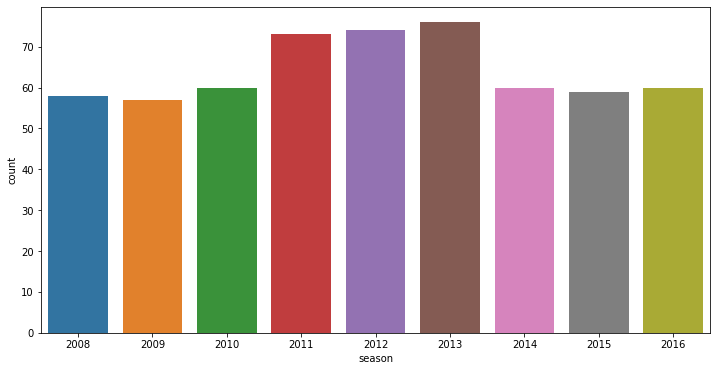

In [13]:
# looking for years: we can find with 'season' section from 'matches_df'
# make a plot for better vision:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=matches_df)
plt.show()

QUS: 1. Which team won most no of matches?

# from the ".describe()" format: whichg we already did it: we can give ans:

Ans: top: winner: Mumbai Indians.

      so, Mumbai indians won most of matches.

QUS: 2. Number of matches played in each season and no. of balls?

Total Matches played By Year

In [14]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [15]:
# no. of matches we played during each season.. for that ...
# can use ".value_counts()"
matches_df["season"].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2015    59
2008    58
2009    57
Name: season, dtype: int64

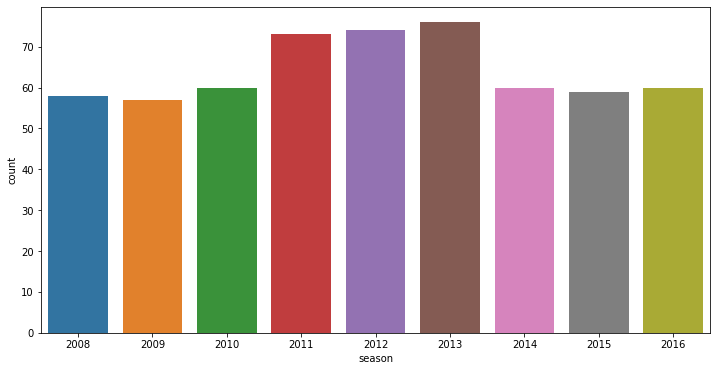

In [17]:
# for numerical values we can use 'count_plot':
# here, for number of matches we got numbers for all seasons:
# create "countplot"

plt.figure(figsize=(12,6))
sns.countplot(x="season", data = matches_df)
plt.show()

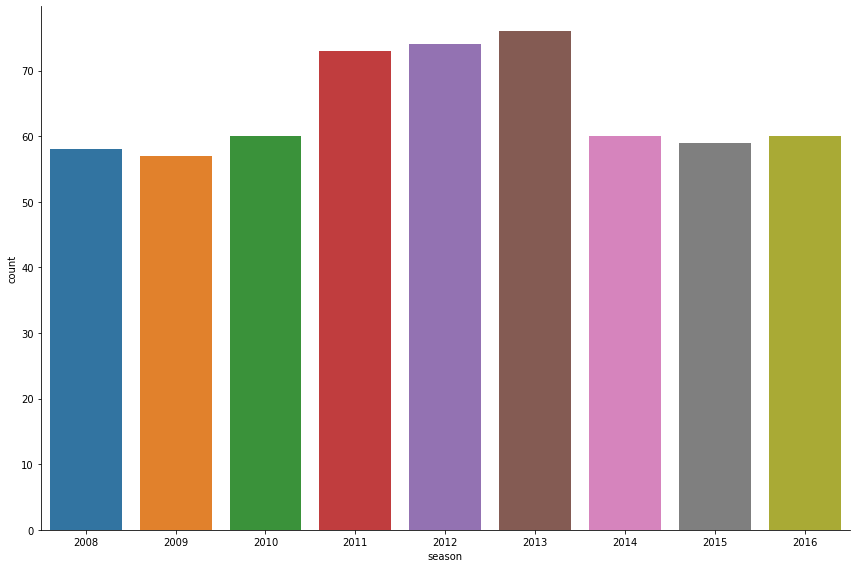

In [18]:
# for more than 1 categoried we can use "catplot"

sns.catplot(x="season", data=matches_df, kind="count", height=8, aspect=1.5)

ANS(Inference):
1. Maximum matches playes in 2013 and it was 73. 
2. Minimum matches played in 2009 and it was 57.

QuS:2
1. HOw many no of balls we played in each season?
2. HOw many no of balls we played in each season?

In [19]:
# for balls we will use "score_df":
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [20]:
# we will use "Groupby" and join comman data with the use of "merge":
score_df.groupby(["match_id","inning"])["ball"].count()

match_id  inning
1         1         124
          2         101
2         1         124
          2         124
3         1         122
                   ... 
575       2         120
576       1         125
          2         117
577       1         126
          2         124
Name: ball, Length: 1164, dtype: int64

In [21]:
# it was not in aproprite manner : doesn't look good data:
ball_groupby = score_df.groupby(["match_id","inning"])["ball"].count()

In [22]:
ball_df = ball_groupby.reset_index()

In [23]:
# now we want to include id and season from the matches_df:

req_col = ["id", "season"]
season_df  = matches_df[req_col]

In [24]:
season_df

,id,season
0,1,2008
1,2,2008
2,3,2008
3,4,2008
4,5,2008
...,...,...
572,573,2016
573,574,2016
574,575,2016
575,576,2016


In [25]:
# we are copying the data of season_df:
season_df1 = season_df.copy(deep=True)

In [26]:
# now: after copying comman columns name we will change
# which is id columns : so from id to match_id we will rename it:
season_df1.rename(columns = {"id" : "match_id"},inplace = True)

In [27]:
season_df1

,match_id,season
0,1,2008
1,2,2008
2,3,2008
3,4,2008
4,5,2008
...,...,...
572,573,2016
573,574,2016
574,575,2016
575,576,2016


In [28]:
ball_df

,match_id,inning,ball
0,1,1,124
1,1,2,101
2,2,1,124
3,2,2,124
4,3,1,122
...,...,...,...
1159,575,2,120
1160,576,1,125
1161,576,2,117
1162,577,1,126


In [29]:
# season_df,ball_df-both has comman id:
#so,we can merge here using "pd.merge"
ball_season_df = pd.merge(season_df, ball_df, how= "inner", left_on ="id", right_on = "match_id")

In [30]:
ball_season_df

,id,season,match_id,inning,ball
0,1,2008,1,1,124
1,1,2008,1,2,101
2,2,2008,2,1,124
3,2,2008,2,2,124
4,3,2008,3,1,122
...,...,...,...,...,...
1159,575,2016,575,2,120
1160,576,2016,576,1,125
1161,576,2016,576,2,117
1162,577,2016,577,1,126


In [31]:
# after rename the "id" columns: we don't don't need left_on or right_on:
pd.merge(season_df1, ball_df, how = "inner", on = "match_id")

,match_id,season,inning,ball
0,1,2008,1,124
1,1,2008,2,101
2,2,2008,1,124
3,2,2008,2,124
4,3,2008,1,122
...,...,...,...,...
1159,575,2016,2,120
1160,576,2016,1,125
1161,576,2016,2,117
1162,577,2016,1,126


In [32]:
# if we don't need 'match_id' column so we drop it:
# by using ".drop"
ball_season_df.drop("match_id", axis=1, inplace=True)

In [33]:
ball_season_df

,id,season,inning,ball
0,1,2008,1,124
1,1,2008,2,101
2,2,2008,1,124
3,2,2008,2,124
4,3,2008,1,122
...,...,...,...,...
1159,575,2016,2,120
1160,576,2016,1,125
1161,576,2016,2,117
1162,577,2016,1,126


In [34]:
# now for each season nd innings we will use .groupby
ball_season_df = ball_season_df.groupby(["season", "inning"])["ball"].sum().reset_index()

In [35]:
# now we don't want inning 3,4: we will remove it by using 'isin' func: 
ball_season_df[ball_season_df["inning"].isin([1,2])]

,season,inning,ball
0,2008,1,7065
1,2008,2,6424
2,2009,1,7021
3,2009,2,6574
6,2010,1,7491
7,2010,2,6998
10,2011,1,8863
11,2011,2,8150
12,2012,1,9096
13,2012,2,8671


In [36]:
ball_season_df

,season,inning,ball
0,2008,1,7065
1,2008,2,6424
2,2009,1,7021
3,2009,2,6574
4,2009,3,7
5,2009,4,4
6,2010,1,7491
7,2010,2,6998
8,2010,3,5
9,2010,4,4


In [37]:
ball_season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   season  28 non-null     int64
 1   inning  28 non-null     int64
 2   ball    28 non-null     int64
dtypes: int64(3)
memory usage: 800.0 bytes


In [38]:
# we have to convert season- from int to string.. 
# we will use 'lambda func':
# after that we can plot it in a barplot:
ball_season_df['season'] = ball_season_df['season'].apply(lambda x:str(x))

In [39]:
sns.barplot?

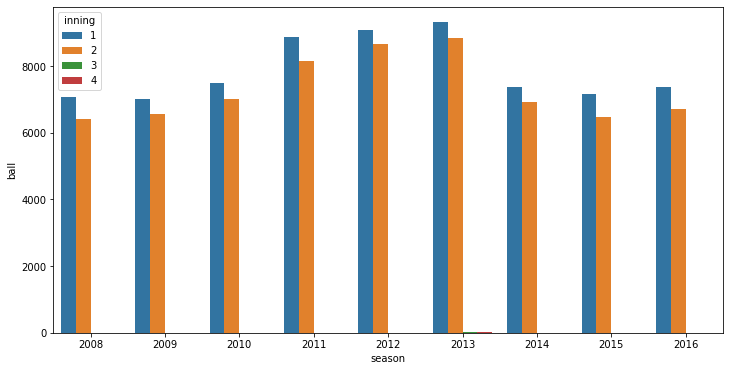

In [40]:
# here we don't need inning - 3,4:
# we will use catplot:
plt.figure(figsize= (12,6))
sns.barplot(x = "season", y= "ball", data = ball_season_df, hue= "inning")
plt.show()

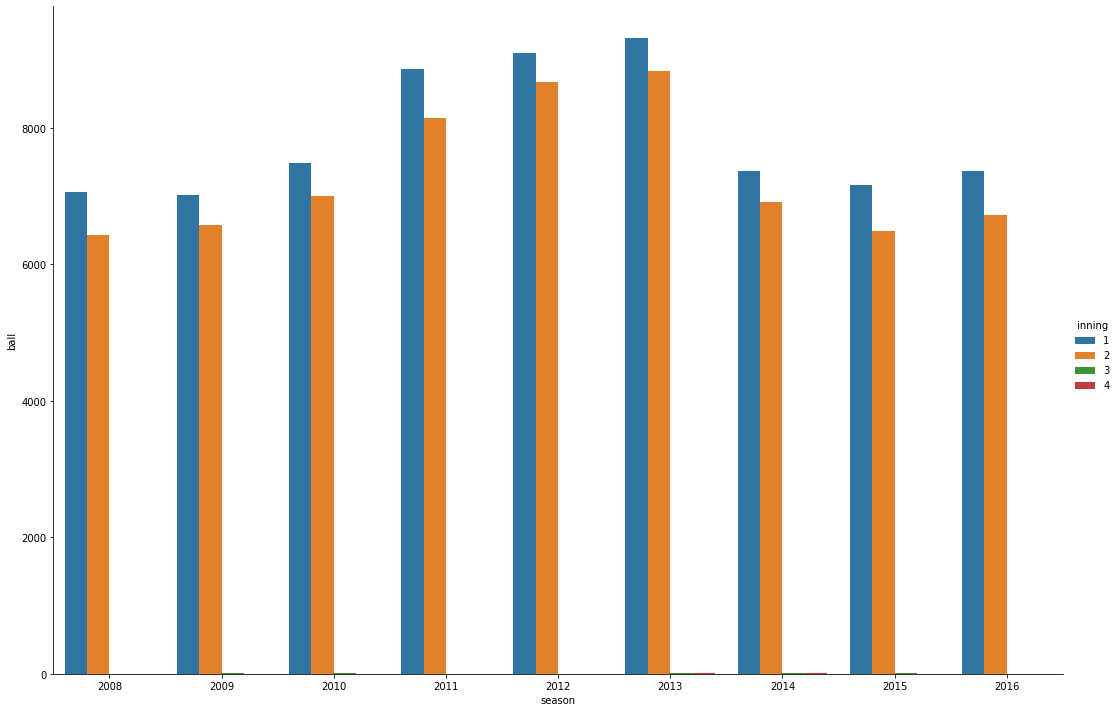

In [41]:
# we can also use catpolot
sns.catplot(x="season",y= "ball", data = ball_season_df,hue= 'inning', kind = "bar", height=10, aspect=1.5)

Inference :
1. Most balls played in 2013 inning.
2. Inning 1 always has more no of balls played  compared to inning 2.

Qus : what no of matches played in Delhi, Chennai, Kolkata & retrive the data:

In [42]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [43]:
# cell-11 where we used '|' is not so relavent so .. we will use..
# '.isin' func: 
city_list = ["Kolkata", "Delhi", "Chennai"]

In [44]:
[matches_df["city"].isin(city_list)]

[0      False
 1      False
 2       True
 3      False
 4       True
        ...  
 572    False
 573    False
 574     True
 575     True
 576    False
 Name: city, Length: 577, dtype: bool]

In [45]:
# using "filter" func:
matches_df[(matches_df["city"] == "Kolkata") | (matches_df["city"] == "Chennai") | (matches_df["city"] == "Delhi")]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
11,12,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
15,16,2008,Kolkata,2008-04-29,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,ST Jayasuriya,Eden Gardens,BF Bowden,AV Jayaprakash,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,562,2016,Kolkata,2016-05-14,Rising Pune Supergiants,Kolkata Knight Riders,Rising Pune Supergiants,bat,normal,1,Kolkata Knight Riders,0,8,YK Pathan,Eden Gardens,A Nand Kishore,BNJ Oxenford,NaN
564,565,2016,Kolkata,2016-05-16,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,V Kohli,Eden Gardens,CB Gaffaney,A Nand Kishore,NaN
571,572,2016,Kolkata,2016-05-22,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,22,0,YK Pathan,Eden Gardens,KN Ananthapadmanabhan,M Erasmus,NaN
574,575,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN


Qus: Highest & Lowest score in each season?

Qus: Total run scored by each team across all seasons?

In [46]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [47]:
team_score_df = score_df.groupby(["match_id", "batting_team"])["total_runs"].sum().reset_index()

In [48]:
team_score_df

,match_id,batting_team,total_runs
0,1,Kolkata Knight Riders,222
1,1,Royal Challengers Bangalore,82
2,2,Chennai Super Kings,240
3,2,Kings XI Punjab,207
4,3,Delhi Daredevils,132
...,...,...,...
1147,575,Sunrisers Hyderabad,162
1148,576,Gujarat Lions,162
1149,576,Sunrisers Hyderabad,163
1150,577,Royal Challengers Bangalore,200


In [49]:
season_df

,id,season
0,1,2008
1,2,2008
2,3,2008
3,4,2008
4,5,2008
...,...,...
572,573,2016
573,574,2016
574,575,2016
575,576,2016


In [50]:
team_season_df = pd.merge(season_df, team_score_df, how = "inner", left_on = "id", right_on = "match_id")

In [51]:
team_season_df

,id,season,match_id,batting_team,total_runs
0,1,2008,1,Kolkata Knight Riders,222
1,1,2008,1,Royal Challengers Bangalore,82
2,2,2008,2,Chennai Super Kings,240
3,2,2008,2,Kings XI Punjab,207
4,3,2008,3,Delhi Daredevils,132
...,...,...,...,...,...
1147,575,2016,575,Sunrisers Hyderabad,162
1148,576,2016,576,Gujarat Lions,162
1149,576,2016,576,Sunrisers Hyderabad,163
1150,577,2016,577,Royal Challengers Bangalore,200


In [53]:
team_season_df.groupby(["season", "batting_team"])["total_runs"].sum().reset_index()

,season,batting_team,total_runs
0,2008,Chennai Super Kings,2520
1,2008,Deccan Chargers,2229
2,2008,Delhi Daredevils,2118
3,2008,Kings XI Punjab,2464
4,2008,Kolkata Knight Riders,1942
...,...,...,...
71,2016,Kolkata Knight Riders,2263
72,2016,Mumbai Indians,2194
73,2016,Rising Pune Supergiants,2063
74,2016,Royal Challengers Bangalore,2981


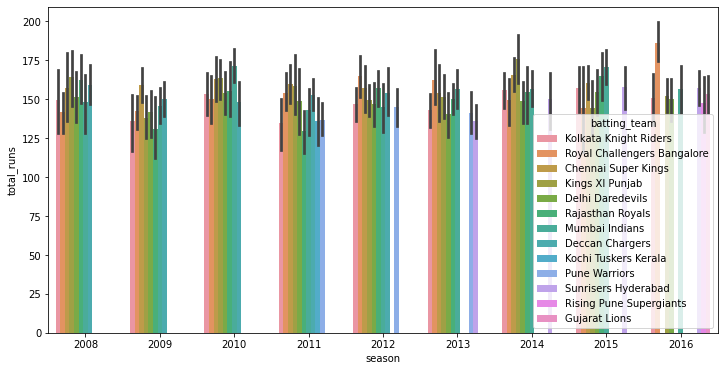

In [54]:
# make a plot:
plt.figure(figsize= (12,6))
sns.barplot(x = "season", y= "total_runs", data = team_season_df, hue= "batting_team")
plt.show()

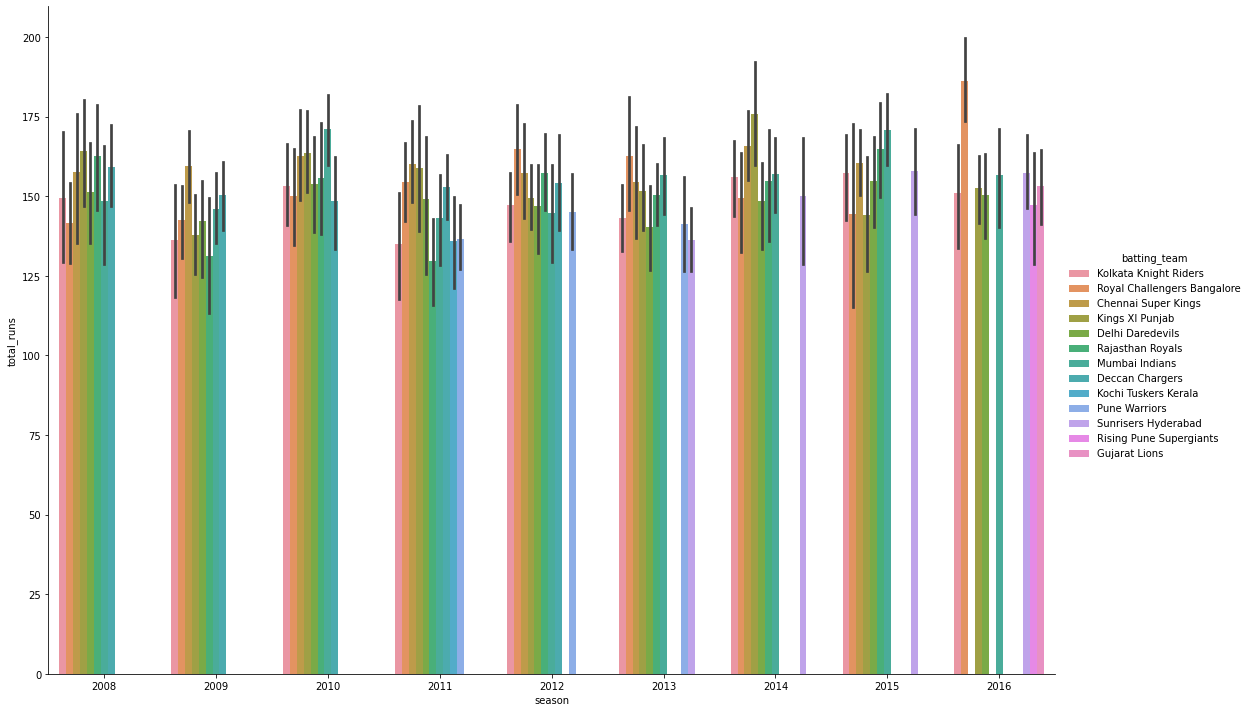

In [55]:
sns.catplot(x="season",y= "total_runs", data = team_season_df,hue= 'batting_team', kind = "bar", height=10, aspect=1.5)

Qus: Which batsman have maximum 6 & 4 :

In [56]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [57]:
# for checking 4 & 6 runs: use ".unique" func
score_df["batsman_runs"].unique()

array([0, 4, 6, 1, 2, 5, 3], dtype=int64)

In [61]:
# now sep. 4 & 6 runs: 
# use 'batsman_runs' with ".isin" func:
req_cols = ["match_id","batsman","batsman_runs"]
batsman_df = score_df[score_df["batsman_runs"].isin([4,6])][req_cols].reset_index(drop=True)

In [62]:
batsman_df

,match_id,batsman,batsman_runs
0,1,BB McCullum,4
1,1,BB McCullum,4
2,1,BB McCullum,6
3,1,BB McCullum,4
4,1,BB McCullum,4
...,...,...,...
21233,577,SR Watson,6
21234,577,STR Binny,6
21235,577,Sachin Baby,4
21236,577,Sachin Baby,6


In [63]:
batsman_df["Count"] = batsman_df["batsman_runs"]

In [64]:
batsman_df = batsman_df.groupby(['batsman', 'batsman_runs'])["Count"].count().reset_index()

In [65]:
batsman_df

,batsman,batsman_runs,Count
0,A Ashish Reddy,4,16
1,A Ashish Reddy,6,15
2,A Chopra,4,7
3,A Flintoff,4,5
4,A Flintoff,6,2
...,...,...,...
624,Yashpal Singh,4,5
625,Yuvraj Singh,4,175
626,Yuvraj Singh,6,133
627,Z Khan,4,11


In [66]:
# here maximum 4 runs: using "sort_values" $ "asecnding=False":
batsman_df[batsman_df["batsman_runs"] == 4].sort_values(by="Count",ascending=False)

,batsman,batsman_runs,Count
181,G Gambhir,4,422
594,V Kohli,4,361
515,SK Raina,4,360
485,S Dhawan,4,348
477,RV Uthappa,4,341
...,...,...,...
401,P Sahu,4,1
193,GR Napier,4,1
504,SB Bangar,4,1
498,SA Abbott,4,1


In [67]:
# and here maximum 6 runs: using "sort_values" $ "asecnding=False":
batsman_df[batsman_df["batsman_runs"] == 6].sort_values(by="Count",ascending=False)

,batsman,batsman_runs,Count
113,CH Gayle,6,252
449,RG Sharma,6,164
516,SK Raina,6,161
595,V Kohli,6,149
621,YK Pathan,6,143
...,...,...,...
58,AP Dole,6,1
55,AN Ahmed,6,1
38,AD Mascarenhas,6,1
476,RV Gomez,6,1


Infrences:
1. G. Gambhir hits maximum 4 no. of scores.
2. CH Gayle hits maximum 6 no. of scores.

Qus: Who has taken highest and lowest wicket ?

In [68]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [69]:
print(score_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          136598 non-null  int64 
 1   inning            136598 non-null  int64 
 2   batting_team      136598 non-null  object
 3   bowling_team      136598 non-null  object
 4   over              136598 non-null  int64 
 5   ball              136598 non-null  int64 
 6   batsman           136598 non-null  object
 7   non_striker       136598 non-null  object
 8   bowler            136598 non-null  object
 9   is_super_over     136598 non-null  int64 
 10  wide_runs         136598 non-null  int64 
 11  bye_runs          136598 non-null  int64 
 12  legbye_runs       136598 non-null  int64 
 13  noball_runs       136598 non-null  int64 
 14  penalty_runs      136598 non-null  int64 
 15  batsman_runs      136598 non-null  int64 
 16  extra_runs        136598 non-null  int

In [70]:
score_df["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [71]:
requir_cols = ["match_id","bowler", "dismissal_kind"]
score_df["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [72]:
bowler_df = score_df[requir_cols]

In [73]:
bowler_df.head()

,match_id,bowler,dismissal_kind
0,1,P Kumar,NaN
1,1,P Kumar,NaN
2,1,P Kumar,NaN
3,1,P Kumar,NaN
4,1,P Kumar,NaN


In [74]:
out_category = ['caught','bowled','lbw','stumped','caught and bowled','hit wicket']

In [75]:
bowler_df = bowler_df[bowler_df["dismissal_kind"].isin(out_category)]

In [76]:
bowler_df.groupby(["bowler"])["dismissal_kind"].count().reset_index().sort_values(by="dismissal_kind",ascending=False)

,bowler,dismissal_kind
236,SL Malinga,143
4,A Mishra,124
69,DJ Bravo,122
183,PP Chawla,120
94,Harbhajan Singh,119
...,...,...
223,S Vidyut,1
88,GR Napier,1
18,AC Gilchrist,1
260,T Henderson,1


Inference:
1. looking from the data: SL Malinga took maximum no of wicket in IPL.
2. and minimum no of wicket took by S Vidyut, GR Napier, AC Gilchrist 
    etc. 

Qus: Hightest & lowest run scored by a batsman?

In [77]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [78]:
score_df["batsman_runs"].unique()

array([0, 4, 6, 1, 2, 5, 3], dtype=int64)

In [79]:
req_cols = ["match_id", "batsman", "batsman_runs"]
batsman_df = score_df[req_cols]

In [80]:
batsman_df.groupby(["batsman"])["batsman_runs"].sum().reset_index().sort_values(by="batsman_runs",ascending=False)

,batsman,batsman_runs
409,V Kohli,4115
354,SK Raina,4106
305,RG Sharma,3874
126,G Gambhir,3634
77,CH Gayle,3451
...,...,...
208,M Ashwin,0
277,PJ Cummins,0
403,U Kaul,0
381,Sandeep Sharma (1),0


Inferences:
1. Virat Kohli has most no of runs in IPL.

Qus: Who has umpired for most of the innings?

In [81]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [82]:
umpire1_df = matches_df[["id", "season", "umpire1"]]
umpire1_df

,id,season,umpire1
0,1,2008,Asad Rauf
1,2,2008,MR Benson
2,3,2008,Aleem Dar
3,4,2008,SJ Davis
4,5,2008,BF Bowden
...,...,...,...
572,573,2016,A Nand Kishore
573,574,2016,AK Chaudhary
574,575,2016,M Erasmus
575,576,2016,M Erasmus


In [83]:
umpire2_df = matches_df[["id", "season", "umpire2"]]
umpire2_df

,id,season,umpire2
0,1,2008,RE Koertzen
1,2,2008,SL Shastri
2,3,2008,GA Pratapkumar
3,4,2008,DJ Harper
4,5,2008,K Hariharan
...,...,...,...
572,573,2016,BNJ Oxenford
573,574,2016,HDPK Dharmasena
574,575,2016,C Shamshuddin
575,576,2016,CK Nandan


In [84]:
# Now, merge umpire1 & 2 togeather:
umpire2_df.rename(columns={"umpire2" : "umpire"},inplace=True)
umpire1_df.rename(columns={"umpire1" : "umpire"},inplace=True)

C:\Users\Dixith\AppData\Local\Temp\ipykernel_15848\2369561897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umpire2_df.rename(columns={"umpire2" : "umpire"},inplace=True)
C:\Users\Dixith\AppData\Local\Temp\ipykernel_15848\2369561897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umpire1_df.rename(columns={"umpire1" : "umpire"},inplace=True)


In [85]:
# we will use "append" or "concat" function to combine data-(umpire1,umpire2)
# here we are using "append"
umpire_df = umpire1_df.append(umpire2_df)

C:\Users\Dixith\AppData\Local\Temp\ipykernel_15848\1397630157.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  umpire_df = umpire1_df.append(umpire2_df)


In [86]:
umpire_df["umpire"].value_counts().head()

HDPK Dharmasena    87
S Ravi             72
SJA Taufel         55
Asad Rauf          51
M Erasmus          48
Name: umpire, dtype: int64

Inferences:
1. looking from the data most of umpired in innings is HDPK Dharmasena.

In [87]:
# and we are also using "concat" function:
pd.concat([umpire1_df,umpire2_df])

,id,season,umpire
0,1,2008,Asad Rauf
1,2,2008,MR Benson
2,3,2008,Aleem Dar
3,4,2008,SJ Davis
4,5,2008,BF Bowden
...,...,...,...
572,573,2016,BNJ Oxenford
573,574,2016,HDPK Dharmasena
574,575,2016,C Shamshuddin
575,576,2016,CK Nandan


In [88]:
umpire_df["umpire"].value_counts().head()

HDPK Dharmasena    87
S Ravi             72
SJA Taufel         55
Asad Rauf          51
M Erasmus          48
Name: umpire, dtype: int64

Qus: Toss decisions and winng outcome?

In [89]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [90]:
req_cols = ["toss_winner", "toss_decision", "winner"]

In [91]:
outcome_df = matches_df[req_cols]

In [92]:
outcome_df

,toss_winner,toss_decision,winner
0,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,Chennai Super Kings,bat,Chennai Super Kings
2,Rajasthan Royals,bat,Delhi Daredevils
3,Mumbai Indians,bat,Royal Challengers Bangalore
4,Deccan Chargers,bat,Kolkata Knight Riders
...,...,...,...
572,Royal Challengers Bangalore,field,Royal Challengers Bangalore
573,Royal Challengers Bangalore,field,Royal Challengers Bangalore
574,Kolkata Knight Riders,field,Sunrisers Hyderabad
575,Sunrisers Hyderabad,field,Sunrisers Hyderabad


In [93]:
# creat a new column: if both are same name:means winner: assign 1
#                        & diffrent name:     means lost : assign 0 
# so, here we will make a function from def:

In [94]:
def outcome(toss_winner, winner):
    # win= 1 , lost = 0
    if toss_winner == winner:
        result = 1
    else:
        result = 0
        
    return result

In [95]:
# now we will apply "lambda" func:
# here we are using df-[dataframe] or we can also use x or any name we want to use:( x can help)
outcome_df["outcome"] = outcome_df.apply(lambda df: outcome(df["toss_winner"],df["winner"]),axis = 1)

C:\Users\Dixith\AppData\Local\Temp\ipykernel_15848\2430620389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome_df["outcome"] = outcome_df.apply(lambda df: outcome(df["toss_winner"],df["winner"]),axis = 1)


In [96]:
# outcome for winner == 1 
outcome_df[outcome_df["outcome"] == 1]

,toss_winner,toss_decision,winner,outcome
1,Chennai Super Kings,bat,Chennai Super Kings,1
8,Rajasthan Royals,field,Rajasthan Royals,1
10,Rajasthan Royals,field,Rajasthan Royals,1
12,Deccan Chargers,field,Deccan Chargers,1
14,Chennai Super Kings,bat,Chennai Super Kings,1
...,...,...,...,...
570,Gujarat Lions,field,Gujarat Lions,1
572,Royal Challengers Bangalore,field,Royal Challengers Bangalore,1
573,Royal Challengers Bangalore,field,Royal Challengers Bangalore,1
575,Sunrisers Hyderabad,field,Sunrisers Hyderabad,1


In [97]:
# outcome for lost == 0:
outcome_df[outcome_df["outcome"] == 0]

,toss_winner,toss_decision,winner,outcome
0,Royal Challengers Bangalore,field,Kolkata Knight Riders,0
2,Rajasthan Royals,bat,Delhi Daredevils,0
3,Mumbai Indians,bat,Royal Challengers Bangalore,0
4,Deccan Chargers,bat,Kolkata Knight Riders,0
5,Kings XI Punjab,bat,Rajasthan Royals,0
...,...,...,...,...
563,Delhi Daredevils,field,Mumbai Indians,0
566,Kings XI Punjab,field,Royal Challengers Bangalore,0
569,Kings XI Punjab,bat,Rising Pune Supergiants,0
571,Sunrisers Hyderabad,field,Kolkata Knight Riders,0


In [98]:
outcome_df

,toss_winner,toss_decision,winner,outcome
0,Royal Challengers Bangalore,field,Kolkata Knight Riders,0
1,Chennai Super Kings,bat,Chennai Super Kings,1
2,Rajasthan Royals,bat,Delhi Daredevils,0
3,Mumbai Indians,bat,Royal Challengers Bangalore,0
4,Deccan Chargers,bat,Kolkata Knight Riders,0
...,...,...,...,...
572,Royal Challengers Bangalore,field,Royal Challengers Bangalore,1
573,Royal Challengers Bangalore,field,Royal Challengers Bangalore,1
574,Kolkata Knight Riders,field,Sunrisers Hyderabad,0
575,Sunrisers Hyderabad,field,Sunrisers Hyderabad,1


In [99]:
req_cols = ["toss_decision","outcome"]
outcome_df = outcome_df[req_cols]

In [100]:
# for "count" we are adding 'count' in outcome_df:
outcome_df["count"] = outcome_df["outcome"]

C:\Users\Dixith\AppData\Local\Temp\ipykernel_15848\4074569055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome_df["count"] = outcome_df["outcome"]


In [101]:
outcome_df = outcome_df.groupby(['toss_decision','outcome'])['count'].count().reset_index()

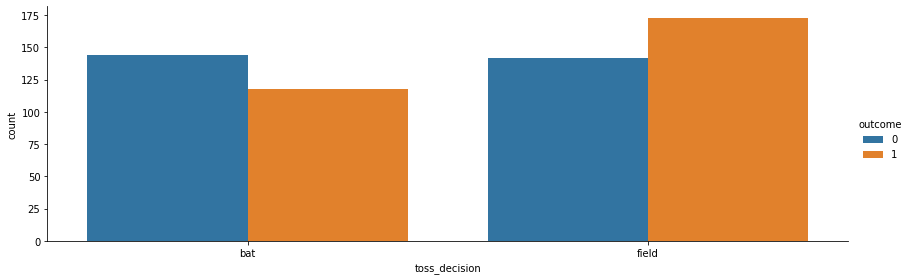

In [102]:
sns.catplot(x='toss_decision', y='count',data=outcome_df,hue="outcome",kind="bar",height=4,aspect=3)
plt.show()

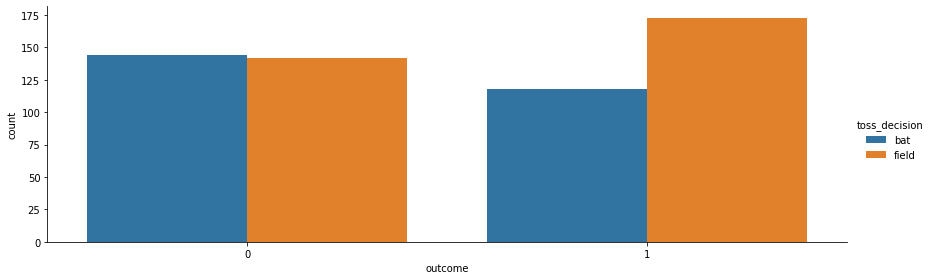

In [103]:
sns.catplot(x= "outcome", y = "count", data= outcome_df,hue = "toss_decision", kind="bar", height=4,aspect=3)
plt.show()

Inference:
1. when we choose to field first chances are more in comparision to            choose bat first. 
2. when team won, they choose to field first in most of the cases.

In [104]:
outcome_df

,toss_decision,outcome,count
0,bat,0,144
1,bat,1,118
2,field,0,142
3,field,1,173


from here start with eda-ipl-dataset practice qus. which already given in file..